Strong form equation
$$
    -u'' = x^2, \in (0, 1), \\
    u(0) = u(1) = 0,
$$
with solution
$$
    u(x) = -\frac{1}{12}x^4 + \frac{1}{12}x
$$
leads to weak form equation
$$
    \int_0^1 u' v' dx = \int_0^1 f v dx, \forall \, v.
$$
Discretize to 
$$
    \int_0^1 u_h' N_l' dx = \int_0^1 f N_l dx, \, l = 0, ..., 10, \\
$$
where
$$
    u_h(x) = \sum_{k=0}^{10} u_k N_k(x) \\
    \implies \sum_{k=0}^{10} u_k \int_0^1 N_k' N_l' dx = \int_0^1 f N_l dx, \, l = 0, ..., 10
$$
and the test functions $N_k$ are the Bernstein polynomials of order 10
$$
    N_k(x) = B_k(x) = x^k (1 - x)^{10-k}.
$$

The above equations lead to the linear system
$$
    Au = b, \\
    A_{lk} = \int_0^1 N_k' N_l' dx, \\
    b_l = \int_0^1 f N_l dx.
$$

From the boundary conditions $u(0) = u(1) = 0$, we immediately know that $u_0 = u_{10} = 0$, so we remove them from the computations. If we don't do this, the stiffness matrix is singular.

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = Symbol('x')

f = x**2

def Nl(l_in: int):
    assert 0 < l_in < 10
    return x**l_in * (1 - x)**(10 - l_in) * binomial(10, l_in)


# data matrix
M = [[0 for _ in range(9+1)] for _ in range(9)]

# Load vector

def L(v):
    return integrate(f*v, (x, 0, 1))

for l in range(1, 9+1):
    M[l-1][9] = L(Nl(l))


# Stiffness matrix

eps = 1e-1 * 0
def a(u, v):
    return integrate(diff(u, x) * diff(v, x) + eps*u*v, (x, 0, 1))

for l in range(1, 9+1):
    v_f = Nl(l)
    for k in range(1, 9+1):
        u_f = Nl(k)
        a_val = a(u_f, v_f)# + 0.1
        
        M[l-1][k-1] = a(u_f, v_f)# + 0.1


0.0
7679.341908837081


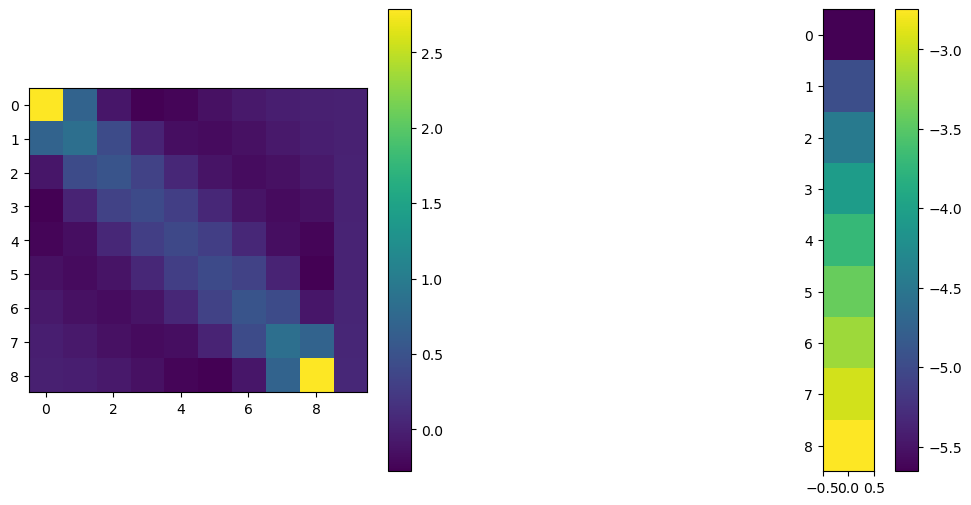

In [3]:
M_np = np.array([[float(M[i][j]) for j in range(9+1)] for i in range(9)])[:,:]

fig, axs = plt.subplots(1,2, figsize=(12,6))

#plt.figure()
aim = axs[0].imshow(M_np)
plt.colorbar(aim)

#plt.figure()
bim = axs[1].imshow(np.log(M_np[:,[-1]]))
plt.colorbar(bim)

print(np.linalg.norm(M_np[:,:-1].T - M_np[:,:-1]))

print(np.linalg.cond(M_np[:,:-1]))

In [4]:
M_mat = Matrix(M)

x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
x4 = Symbol('x4')
x5 = Symbol('x5')
x6 = Symbol('x6')
x7 = Symbol('x7')
x8 = Symbol('x8')
x9 = Symbol('x9')
        
a = solve_linear_system(M_mat, x1, x2, x3, x4, x5, x6, x7, x8, x9)

print(a)

u_h = a[x1] * Nl(1) + a[x2] * Nl(2) + a[x3] * Nl(3) + a[x4] * Nl(4) + \
    a[x5] * Nl(5) + a[x6] * Nl(6) + a[x7] * Nl(7) + a[x8] * Nl(8) + a[x9] * Nl(9)
print(u_h)

{x1: 1/120, x2: 1/60, x3: 1/40, x4: 83/2520, x5: 5/126, x6: 37/840, x7: 2/45, x8: 7/180, x9: 1/40}
x**9*(1 - x)/4 + 7*x**8*(1 - x)**2/4 + 16*x**7*(1 - x)**3/3 + 37*x**6*(1 - x)**4/4 + 10*x**5*(1 - x)**5 + 83*x**4*(1 - x)**6/12 + 3*x**3*(1 - x)**7 + 3*x**2*(1 - x)**8/4 + x*(1 - x)**9/12


''

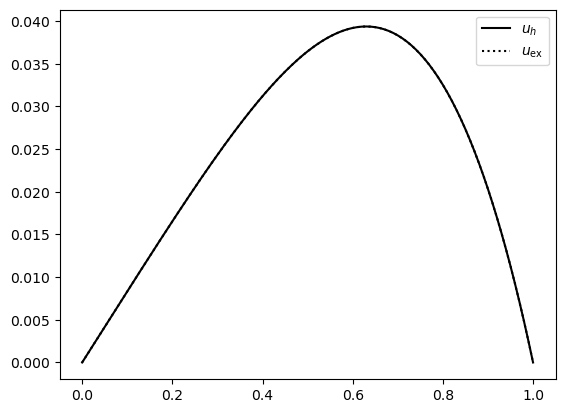

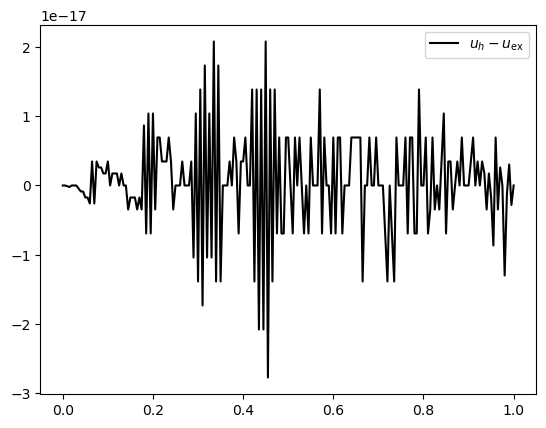

In [5]:

u_h_f = lambdify(x, u_h, "numpy")
u_ex_f = lambdify(x, -x**4 / 12 + x / 12, "numpy")

plt.figure()

xx = np.linspace(0, 1, 201)
plt.plot(xx, u_h_f(xx), 'k-', label=r"$u_h$")
plt.plot(xx, u_ex_f(xx), 'k:', label=r"$u_\mathrm{ex}$")
plt.legend()

plt.figure()

plt.plot(xx, u_h_f(xx) - u_ex_f(xx), 'k-', label=r"$u_h - u_\mathrm{ex}$")
plt.legend()

;
